In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from Train_Test_Split import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from LLS import LinearLeastSquare


# Data preprocess :

In [4]:
data = pd.read_csv("HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## 💸Update Dollar Price To july 2024

In [5]:
data.drop_duplicates(inplace=True)

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data["Price(USD)"] = data["Price(USD)"] * (65 / 30)

data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,133611.118333
1,60,1,True,True,True,Shahran,1.850000e+09,133611.118333
2,79,2,True,True,True,Pardis,5.500000e+08,39722.215000
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,65180.548333
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,505555.548333


In [6]:
data["Parking"] = data["Parking"].replace([True, False], [1, 0])
data["Warehouse"] = data["Warehouse"].replace([True, False], [1, 0])
data["Elevator"] = data["Elevator"].replace([True, False], [1, 0])
data.head()

C:\Users\Royal Center\AppData\Local\Temp\ipykernel_10248\3683466920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Parking"] = data["Parking"].replace([True, False], [1, 0])
C:\Users\Royal Center\AppData\Local\Temp\ipykernel_10248\3683466920.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Warehouse"] = data["Warehouse"].replace([True, False], [1, 0])
C:\Users\Royal Center\AppData\Local\Temp\ipykernel_10248\3683466920.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,133611.118333
1,60,1,1,1,1,Shahran,1.850000e+09,133611.118333
2,79,2,1,1,1,Pardis,5.500000e+08,39722.215000
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,65180.548333
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,505555.548333


# Show the Address of the 5 most Expensive Houses 

In [7]:
sorted_data = data.sort_values(by="Price", ascending=False)
top_5_expensive_houses = sorted_data.head(5)
top_5_expensive_houses = top_5_expensive_houses[["Address", "Price"]]
top_5_expensive_houses

,Address,Price
1606,Zaferanieh,9.240000e+10
1704,Abazar,9.100000e+10
405,Lavasan,8.500000e+10
770,Ekhtiarieh,8.160000e+10
1249,Niavaran,8.050000e+10


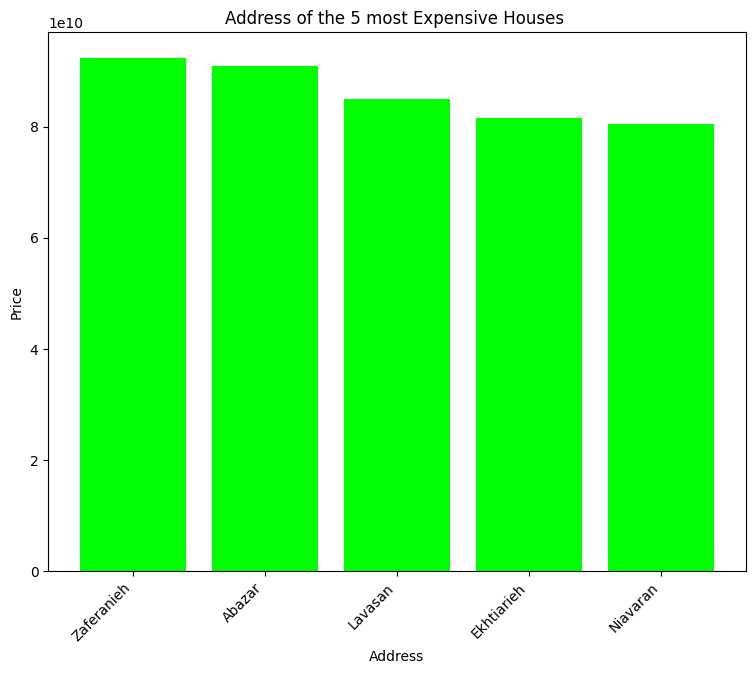

In [8]:
plt.figure(figsize=(9, 7))
plt.bar(top_5_expensive_houses["Address"],
        top_5_expensive_houses["Price"], color="Lime")
plt.title("Address of the 5 most Expensive Houses ")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

# Train :

In [9]:
data.drop(["Address"], inplace=True, axis=1)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,1,1,1,1.850000e+09,133611.118333
1,60,1,1,1,1,1.850000e+09,133611.118333
2,79,2,1,1,1,5.500000e+08,39722.215000
3,95,2,1,1,1,9.025000e+08,65180.548333
4,123,2,1,1,1,7.000000e+09,505555.548333


In [10]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670121,0.200009,0.072364,0.047034,0.720935,0.720935
Room,0.670121,1.000000,0.278743,0.125894,0.181826,0.569738,0.569738
Parking,0.200009,0.278743,1.000000,0.429241,0.428801,0.193761,0.193761
Warehouse,0.072364,0.125894,0.429241,1.000000,0.205098,0.109370,0.109370
Elevator,0.047034,0.181826,0.428801,0.205098,1.000000,0.110310,0.110310
Price,0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000
Price(USD),0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000


In [11]:
X = np.array([data["Area"], data["Room"], data["Parking"]]).T
Y = np.array(data["Price"])

In [12]:
x_train, y_train, x_test, y_test = train_test_split(X, Y)

print(f"x_train shape is {x_train.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"x_test shape is {x_test.shape}")
print(f"y_test shape is {y_test.shape}")

x_train shape is (2593, 3)
y_train shape is (2593,)
x_test shape is (649, 3)
y_test shape is (649,)


In [13]:
lls = LinearLeastSquare()
lls.fit(x_train, y_train)

## Compare result with Scikit-Learn's results

In [14]:
MAE_loss = lls.evaluate(x_test, y_test, "mae")
MSE_loss = lls.evaluate(x_test, y_test, "mse")
RMSE_loss = lls.evaluate(x_test, y_test, "rmse")

print("LinearLeastSquare MAE =" , MAE_loss)
print("LinearLeastSquare MSE =" , MSE_loss)
print("LinearLeastSquare RMSE =" , RMSE_loss)

LinearLeastSquare MAE = 3146840572.598611
LinearLeastSquare MSE = 3.2639095299382936e+19
LinearLeastSquare RMSE = 5713063565.144618


## RidgeCV

In [15]:
ridgecv_model = RidgeCV(alphas=tuple(np.logspace(-3, 0, num=4)))
ridgecv_model.fit(x_train, y_train)
y_pred_ridgcv = ridgecv_model.predict(x_test)
MAE_ridge = mean_absolute_error(y_test, y_pred_ridgcv)
MSE_ridge = mean_squared_error(y_test, y_pred_ridgcv)
RMSE_ridge = np.sqrt(MSE_ridge)

print("RidgeCV MAE =" , MAE_ridge)
print("RidgeCV MSE =" , MSE_ridge)
print("RidgeCV RMSE =" , RMSE_ridge)

RidgeCV MAE = 3030020558.2048974
RidgeCV MSE = 3.081946358209127e+19
RidgeCV RMSE = 5551528040.28686


In [16]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
Y_pred_linear = linear_model.predict(x_test)
MAE_linreg = mean_absolute_error(y_test, Y_pred_linear)
MSE_linreg = mean_squared_error(y_test, Y_pred_linear)
RMSE_linreg = np.sqrt(MSE_linreg)


print("LinearRegression MAE =" , MAE_linreg)
print("LinearRegression MSE =" , MSE_linreg)
print("LinearRegression RMSE =" , RMSE_linreg)

LinearRegression MAE = 3030669847.522402
LinearRegression MSE = 3.0824318997030683e+19
LinearRegression RMSE = 5551965327.434122


|ERROR | MeanAbsoluteError | MeanSquaredError | RootMeanSquaredError |
| :---          |     :---:      |     :---:     |          ---: |
|LinearLeastSquare| 3283843917.195741    | 4.228054165728168e+19    | 6502348933.830119    |
|LinearRegression | 3063125616.2289405     | 3.942122695718726e+19    | 6278632570.646833    |
|RidgeCV          | 3062539132.375875     | 3.94159888399221e+19    | 6278215418.406898    |

## Why the MSE metric is a very large number?
* Because the numbers of the differences have been raised to the power of 2 to get out of the negative state, but at the end, no root has been taken from them.